# 순환 신경망(Recurrent Neural Network, RNN)

- 루프(loop)를 가진 신경망의 한 종류

- 시퀀스의 원소를 순회하면서 지금까지 처리한 정보를 상태(state)에 저장

<img src="https://miro.medium.com/max/627/1*go8PHsPNbbV6qRiwpUQ5BQ.png">

<sub>출처: https://towardsdatascience.com/understanding-rnn-and-lstm-f7cdf6dfc14e</sub>

## 순환 신경망 레이어 (RNN Layer)

- 입력: `(timesteps, input_features)`

- 출력: `(timesteps, output_features)`

In [1]:
import numpy as np

In [2]:
timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))

state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features)) # 인풋에 동작하는 가중치
U = np.random.random((output_features, output_features)) # 히든으로 동작하는 가중치
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)

    successive_outputs.append(output_t)
    state_t = output_t

final_output_sequence = np.stack(successive_outputs, axis=0)


## 케라스의 순환층
- `SimpleRNN` layer

- 입력: `(batch_size, timesteps, input_features)`

- 출력
  - `return_sequences`로 결정할 수 있음
  
  - 3D 텐서
    - 타임스텝의 출력을 모은 전체 시퀀스를 반환

    - `(batch_size, timesteps, output_features)`

  - 2D 텐서
    - 입력 시퀀스에 대한 마지막 출력만 반환

    - `(batch_size, output_features)`


In [3]:
from tensorflow.keras.layers import SimpleRNN, Embedding
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

- 네트워크의 표현력을 증가시키기 위해 여러 개의 순환층을 차례대로 쌓는 것이 유용할 때가 있음

  - 이런 설정에서는 중간층들이 전체 출력 시퀀스를 반환하도록 설정

In [5]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## IMDB 데이터 적용

### 데이터 로드

In [6]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

num_words = 10000
maxlen = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=num_words)
print(len(input_train))
print(len(input_test))

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print(input_train.shape)
print(input_test.shape)

25000
25000
(25000, 500)
(25000, 500)


### 모델 구성

In [7]:
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Embedding(num_words, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_6 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### 모델 학습

In [8]:
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 75ms/step - acc: 0.5677 - loss: 0.6704 - val_acc: 0.7088 - val_loss: 0.5615
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - acc: 0.8160 - loss: 0.4293 - val_acc: 0.8296 - val_loss: 0.3924
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 70ms/step - acc: 0.8707 - loss: 0.3203 - val_acc: 0.8398 - val_loss: 0.4178
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - acc: 0.8932 - loss: 0.2643 - val_acc: 0.8190 - val_loss: 0.5355
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - acc: 0.9086 - loss: 0.2335 - val_acc: 0.8224 - val_loss: 0.4088
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - acc: 0.9358 - loss: 0.1751 - val_acc: 0.8424 - val_loss: 0.4041
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 73ms/step - acc: 0.9548 - loss: 0.1324 - val_acc: 0.8424 - val_loss: 0.4330
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 74ms/step - acc: 0.9707 - loss: 0.0944 - val_acc: 0.8542 - val_loss: 0.4336
Epoch 9/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 

### 시각화

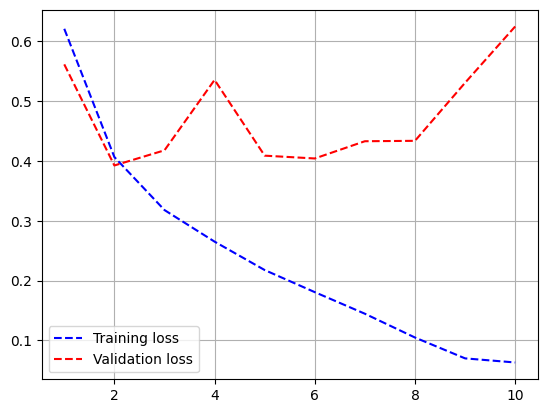

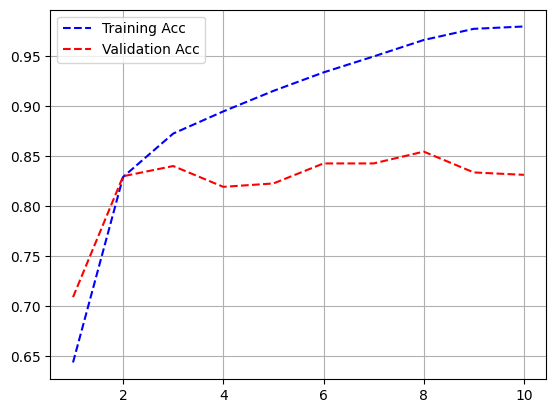

In [13]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)


plt.plot(epochs, loss, 'b--', label='Training loss')
plt.plot(epochs, val_loss, 'r--', label='Validation loss')
plt.grid()
plt.legend()

plt.show()

plt.plot(epochs, acc, 'b--', label='Training Acc')
plt.plot(epochs, val_acc, 'r--', label='Validation Acc')
plt.grid()
plt.legend()

plt.show()

In [11]:
model.evaluate(input_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - acc: 0.8174 - loss: 0.6840


[0.6683089733123779, 0.8196799755096436]

- 전체 시퀀스가 아니라 순서대로 500개의 단어만 입력했기 때문에 성능이 낮게 나옴

- SimpleRNN은 긴 시퀀스를 처리하는데 적합하지 않음

# LSTM과 GRU 레이어

- SimpleRNN은 실전에 사용하기엔 너무 단순

- SimpleRNN은 이론적으로 시간 $t$ 에서 이전의 모든 타임스텝의 정보를 유지할 수 있지만, 실제로는 긴 시간에 걸친 의존성은 학습할 수 없음

- 그래디언트 소실 문제(vanishing gradient problem)
  - 이를 방지하기 위해 LSTM, GRU 같은 레이어 등장



## LSTM(Long Short-Term Memory)
- 장단기 메모리 알고리즘

- 나중을 위해 정보를 저장함으로써 오래된 시그널이 점차 소실되는 것을 막아줌

  <img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png">

  <sub>출처: https://colah.github.io/posts/2015-08-Understanding-LSTMs/</sub>

## 예제로 보는 순환 신경망: Reuters

- IMDB와 유사한 데이터셋(텍스트 데이터)

- 46개의 상호 배타적인 토픽으로 이루어진 데이터셋
  - 다중 분류 문제


### 데이터셋 로드

In [14]:
from tensorflow.keras.datasets import reuters

num_words = 10000
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=num_words)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(8982,)
(2246,)
(8982,)
(2246,)


### 데이터 전처리 및 확인

In [15]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 500

pad_x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
pad_x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

print(len(pad_x_train[0]))

500


In [16]:
pad_x_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

### 모델 구성
- LSTM 레이어도 SimpleRNN과 같이 `return_sequences` 인자 사용가능

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=64))
model.add(LSTM(32))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### 모델 학습

In [21]:
history = model.fit(pad_x_train, y_train,
                    batch_size=32, epochs=20,
                    validation_split=0.2)

Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 23s 95ms/step - acc: 0.3631 - loss: 2.8510 - val_acc: 0.4391 - val_loss: 2.0201
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step - acc: 0.4893 - loss: 1.9126 - val_acc: 0.5387 - val_loss: 1.7531
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - acc: 0.5417 - loss: 1.7236 - val_acc: 0.5426 - val_loss: 1.7334
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - acc: 0.5976 - loss: 1.5619 - val_acc: 0.5954 - val_loss: 1.5622
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 20s 88ms/step - acc: 0.6404 - loss: 1.3645 - val_acc: 0.6166 - val_loss: 1.5278
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 21s 92ms/step - acc: 0.6843 - loss: 1.2550 - val_acc: 0.6227 - val_loss: 1.4915
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - acc: 0.7009 - loss: 1.1585 - val_acc: 0.5932 - val_loss: 1.5213
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 20s 91ms/step - acc: 0.7248 - loss: 1.0532 - val_acc: 0.6461 - val_loss: 1.4626
Epoch 9/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 

### 시각화

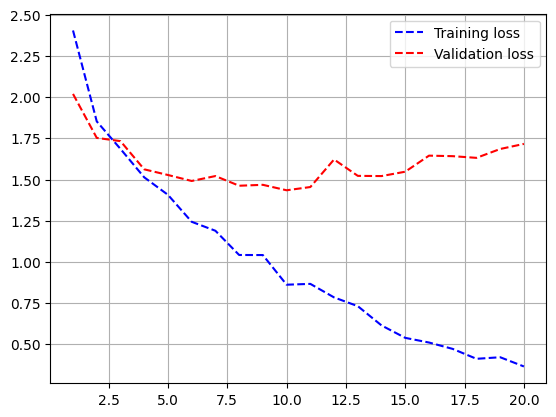

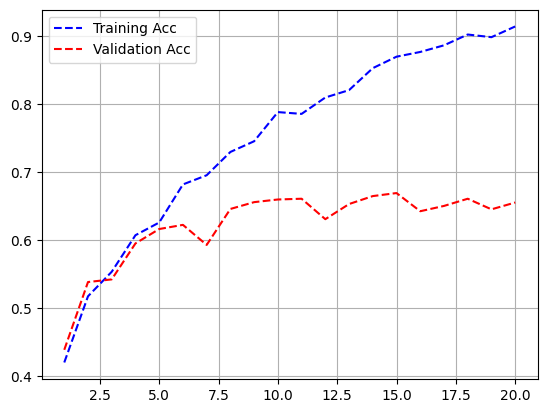

In [22]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)


plt.plot(epochs, loss, 'b--', label='Training loss')
plt.plot(epochs, val_loss, 'r--', label='Validation loss')
plt.grid()
plt.legend()

plt.show()

plt.plot(epochs, acc, 'b--', label='Training Acc')
plt.plot(epochs, val_acc, 'r--', label='Validation Acc')
plt.grid()
plt.legend()

plt.show()

### 모델 평가


In [23]:
model.evaluate(pad_x_test, y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - acc: 0.6499 - loss: 1.8237


[1.9080791473388672, 0.6273375153541565]

## IMDB 데이터셋 with LSTM

### 데이터 로드

In [24]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

num_words = 10000
maxlen = 500
batch_size = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)
print(len(x_train))
print(len(x_test))

pad_x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
pad_x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print(x_train.shape)
print(x_test.shape)

25000
25000
(25000,)
(25000,)


### 모델 구성

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

model = Sequential()
model.add(Embedding(num_words, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### 모델 학습

In [26]:
history = model.fit(pad_x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 26s 156ms/step - acc: 0.5720 - loss: 0.6673 - val_acc: 0.8016 - val_loss: 0.4495
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 24s 154ms/step - acc: 0.8236 - loss: 0.4117 - val_acc: 0.8314 - val_loss: 0.3892
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 24s 153ms/step - acc: 0.8585 - loss: 0.3477 - val_acc: 0.8498 - val_loss: 0.3543
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 25s 156ms/step - acc: 0.8739 - loss: 0.3153 - val_acc: 0.8776 - val_loss: 0.3039
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 25s 157ms/step - acc: 0.8957 - loss: 0.2670 - val_acc: 0.8376 - val_loss: 0.3848
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 24s 154ms/step - acc: 0.9034 - loss: 0.2447 - val_acc: 0.8774 - val_loss: 0.2949
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 25s 156ms/step - acc: 0.9142 - loss: 0.2236 - val_acc: 0.8778 - val_loss: 0.2976
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 25s 157ms/step - acc: 0.9181 - loss: 0.2144 - val_acc: 0.8764 - val_loss: 0.3019
Epoch 9/10
157/157 ━━━━━━━━━━━━━

### 시각화

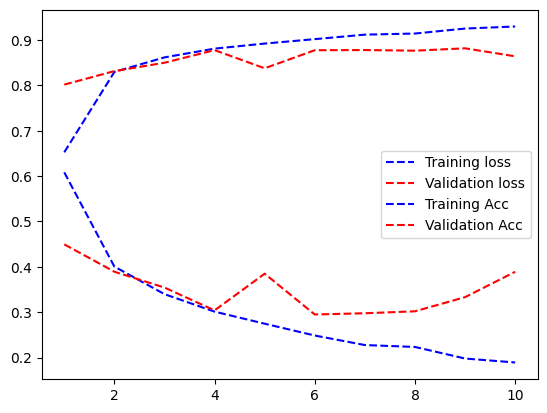

In [27]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)


plt.plot(epochs, loss, 'b--', label='Training loss')
plt.plot(epochs, val_loss, 'r--', label='Validation loss')
plt.grid()
plt.legend()

plt.plot(epochs, acc, 'b--', label='Training Acc')
plt.plot(epochs, val_acc, 'r--', label='Validation Acc')
plt.grid()
plt.legend()

plt.show()

### 모델 평가

In [28]:
model.evaluate(pad_x_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - acc: 0.8585 - loss: 0.4044


[0.39446118474006653, 0.8602799773216248]

# Cosine 함수를 이용한 순환 신경망

In [29]:
import numpy as np

np.random.seed(111)

time = np.arange(30*12+1)
month_time = (time % 30)/ 30
time_series = 20 * np.where(month_time < 0.5,
                            np.cos(2 * np.pi * month_time),
                            np.cos(2 * np.pi * month_time)+ np.random.random(361))


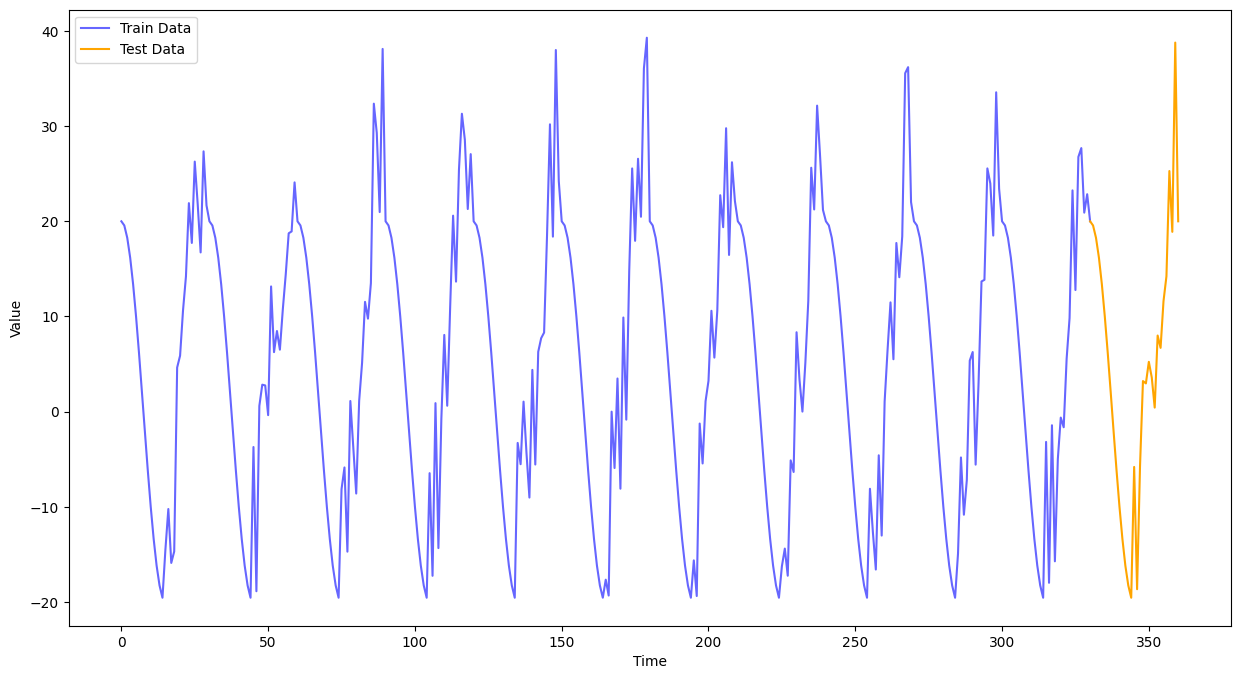

In [30]:
plt.figure(figsize=(15, 8))
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(np.arange(0, 30*11+1),
         time_series[:30*11+1],
         color='blue', alpha=0.6, label='Train Data')
plt.plot(np.arange(30*11, 30*12+1),
         time_series[30*11:],
         color='orange',  label='Test Data')
plt.legend()
plt.show()


### 데이터 전처리

In [31]:
def make_data(time_series, n):
    x_train_full, y_train_full = [], []

    for i in range(len(time_series)):
        if i + n < len(time_series):
            x_train_full.append(time_series[i:i+n])
            y_train_full.append(time_series[i+n])
        else:
          break

    x_train_full = np.array(x_train_full)
    y_train_full = np.array(y_train_full)

    return x_train_full, y_train_full

In [32]:
n = 10
x_train_full, y_train_full = make_data(time_series, n)

print(x_train_full.shape)
print(y_train_full.shape)

(351, 10)
(351,)


In [33]:
x_tarin_full = x_train_full.reshape(-1, n, 1)
y_train_full = y_train_full.reshape(-1,1)

print(x_train_full.shape)
print(y_train_full.shape)

(351, 10)
(351, 1)


## 테스트 데이터셋 생성

In [34]:
x_train = x_tarin_full[:30*11]
y_train = y_train_full[:30*11]

x_test = x_tarin_full[30*11:]
y_test = y_train_full[30*11:]

In [35]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(330, 10, 1) (330, 1)
(21, 10, 1) (21, 1)


## 데이터 확인

In [36]:
sample_series = np.arange(100)
a, b = make_data(sample_series, 10)

print(a[0])
print(b[0])

[0 1 2 3 4 5 6 7 8 9]
10


## 모델 구성

In [37]:
from tensorflow.keras.layers import SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Sequential


def build_model(n):
    model = Sequential()
    model.add(SimpleRNN(32, activation='tanh', input_shape=(n, 1)))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mse')

    return model

In [38]:
model = build_model(10)
model.summary()

c:\Users\USER\miniconda3\envs\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_7 (SimpleRNN)        │ (None, 32)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

## 모델 학습

In [39]:
model.fit(x_train, y_train,
          epochs=100,
          batch_size=12)

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 202.7470   
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 173.3166
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 146.0907 
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 132.3862 
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 122.0341
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 112.1603 
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 94.6699 
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 90.4523
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 83.3531
Epoch 10/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 73.1635
Epoch 11/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 77.3156  
Epoch 12/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 65.8043 
Epoch 13/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 64.5707
Epoch 14/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 65.2888 
Epoch 15/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 

## 예측값 그려보기

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


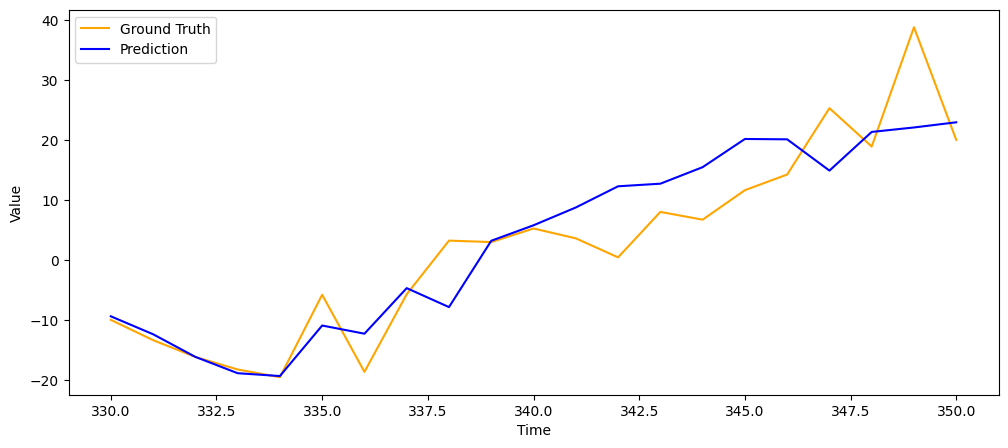

In [40]:
prediction = model.predict(x_test)

pred_range = np.arange(len(y_train), len(y_train)+ len(prediction))

plt.figure(figsize=(12, 5))
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(pred_range, y_test.flatten(), color='orange', label='Ground Truth')
plt.plot(pred_range, prediction.flatten(), color='blue', label='Prediction')
plt.legend()
plt.show()



## 모델 재구성 (2)
- LSTM 사용

In [41]:
from tensorflow.keras.layers import LSTM

def build_model(n):
    model = Sequential()
    model.add(LSTM(64, return_sequences=True, input_shape=(n, 1)))
    model.add(LSTM(32))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mse')

    return model

In [42]:
model2 = build_model(20)
model2.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 20, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

## 모델 재학습 및 예측값 그려보기

In [43]:
model2.fit(x_train, y_train,
          epochs=100,
          batch_size=12)

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 223.1049
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 159.8967
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 120.3275
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 80.0691
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 66.0858
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 58.0013
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 52.4233
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 43.9648
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 39.7643
Epoch 10/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 48.0222
Epoch 11/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 39.1367
Epoch 12/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 32.7510
Epoch 13/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 30.1920
Epoch 14/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 32.6605
Epoch 15/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


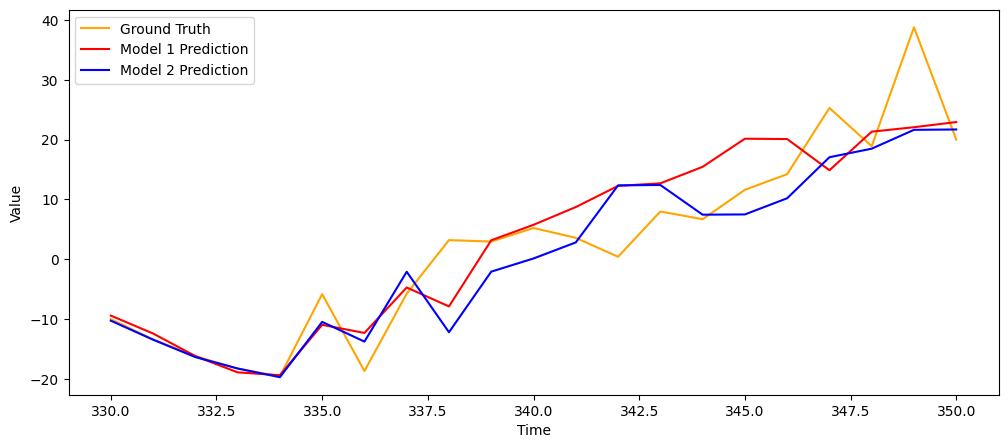

In [44]:
prediction2 = model2.predict(x_test)

pred_range = np.arange(len(y_train), len(y_train)+ len(prediction2))

plt.figure(figsize=(12, 5))
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(pred_range, y_test.flatten(), color='orange', label='Ground Truth')
plt.plot(pred_range, prediction.flatten(), color='red', label='Model 1 Prediction')
plt.plot(pred_range, prediction2.flatten(), color='blue', label='Model 2 Prediction')
plt.legend()
plt.show()



## 모델 재구성(3)
- GRU 사용
  - LSTM 보다 더 쉬운 구조

In [1]:
from tensorflow.keras.layers import GRU

def build_model(n):
    model = Sequential()
    model.add(GRU(128, return_sequences=True, input_shape=(n, 1)))
    model.add(GRU(64))
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mse')

    return model

model3 = build_model(10)
model3.summary()

NameError: name 'Sequential' is not defined

## 모델 재학습 및 예측값 그려보기

In [57]:
model3.fit(x_train, y_train,
           epochs=100,
           batch_size=12)

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 184.2494
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 76.7587
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 57.0631
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 51.7941
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 45.7977
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 35.7454
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 36.6838
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 29.5871
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 33.3480
Epoch 10/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 26.0590
Epoch 11/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24.3728
Epoch 12/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 22.3263
Epoch 13/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 24.4992
Epoch 14/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 21.3752
Epoch 15/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - lo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


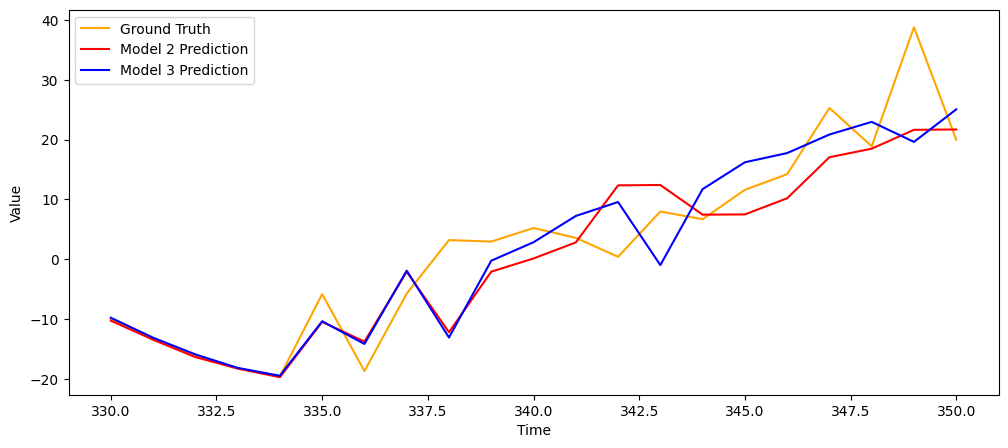

In [58]:
prediction3 = model3.predict(x_test)

pred_range = np.arange(len(y_train), len(y_train)+ len(prediction3))

plt.figure(figsize=(12, 5))
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(pred_range, y_test.flatten(), color='orange', label='Ground Truth')
plt.plot(pred_range, prediction2.flatten(), color='red', label='Model 2 Prediction')
plt.plot(pred_range, prediction3.flatten(), color='blue', label='Model 3 Prediction')
plt.legend()
plt.show()



# Conv1D

- 텍스트 분류나 시계열 예측 같은 간단한 문제, 오디오 생성, 기계 번역 등의 문제에서 좋은 성능

- 타임스텝의 순서에 민감하지 X


- 2D Convolution
  - 지역적 특징을 인식

  <img src="https://missinglink.ai/wp-content/uploads/2019/03/2D-convolutional-example_2x-700x584.png" width="500">

- 1D Convolution
  - 문맥을 인식

  <img src="https://missinglink.ai/wp-content/uploads/2019/03/1D-convolutional-example_2x.png" width="500">

  <sub>출처: https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/</sub>

## Conv1D Layer
- 입력: `(batch_size, timesteps, channels)`

- 출력: `(batch_size, timesteps, filters)`

- 필터의 사이즈가 커져도 모델이 급격히 증가하지 않기 때문에 다양한 크기를 사용할 수 있음
- 데이터의 품질이 좋으면 굳이 크기를 달리하여 여러 개를 사용하지 않아도 될 수도 있음

## MaxPooling1D Layer
- 다운 샘플링 효과

- 단지 1차원형태로 바뀐 것 뿐

## GlobalMaxPooling Layer
- 배치차원을 제외하고 2차원 형태를 1차원 형태로 바꾸어주는 레이어

- Flatten layer로 대신 사용가능

## IMDB 데이터셋

### 데이터 로드 및 전처리

In [59]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D

num_words = 10000
maxlen = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=num_words)

print(len(input_train))
print(len(input_test))

pad_x_train = pad_sequences(input_train, maxlen=maxlen)
pad_x_test = pad_sequences(input_test, maxlen=maxlen)

print(pad_x_train.shape)
print(pad_x_test.shape)

25000
25000
(25000, 500)
(25000, 500)


### 모델 구성

In [60]:
def build_model():
    model = Sequential()
    model.add(Embedding(input_dim=num_words, output_dim=32,
                        input_length=maxlen))
    model.add(Conv1D(32, 7, activation='relu'))
    model.add(MaxPooling1D(7))
    model.add(Conv1D(32, 5, activation='relu'))
    model.add(MaxPooling1D(5))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

    return model

In [61]:
model = build_model()
model.summary()

c:\Users\USER\miniconda3\envs\venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### 모델 학습

In [62]:
history = model.fit(pad_x_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_split=.2)

Epoch 1/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - acc: 0.5576 - loss: 0.6786 - val_acc: 0.8022 - val_loss: 0.4544
Epoch 2/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - acc: 0.8226 - loss: 0.4064 - val_acc: 0.8488 - val_loss: 0.3461
Epoch 3/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - acc: 0.8804 - loss: 0.2927 - val_acc: 0.8608 - val_loss: 0.3293
Epoch 4/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - acc: 0.9053 - loss: 0.2415 - val_acc: 0.8544 - val_loss: 0.3417
Epoch 5/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - acc: 0.9260 - loss: 0.1957 - val_acc: 0.8690 - val_loss: 0.3339
Epoch 6/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - acc: 0.9389 - loss: 0.1689 - val_acc: 0.8688 - val_loss: 0.3361
Epoch 7/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - acc: 0.9513 - loss: 0.1422 - val_acc: 0.8268 - val_loss: 0.4886
Epoch 8/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - acc: 0.9615 - loss: 0.1146 - val_acc: 0.8710 - val_loss: 0.3702
Epoch 9/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/

### 시각화

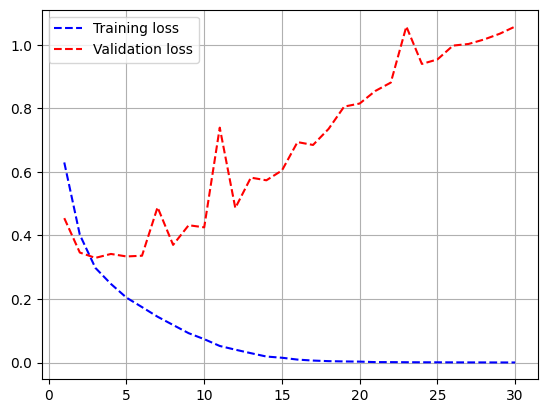

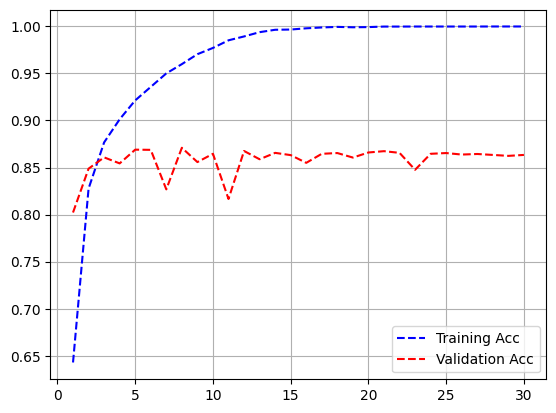

In [63]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)


plt.plot(epochs, loss, 'b--', label='Training loss')
plt.plot(epochs, val_loss, 'r--', label='Validation loss')
plt.grid()
plt.legend()

plt.show()

plt.plot(epochs, acc, 'b--', label='Training Acc')
plt.plot(epochs, val_acc, 'r--', label='Validation Acc')
plt.grid()
plt.legend()

plt.show()

- 과적합이 일어났지만, 다른 옵티마이저 사용, 규제화를 걸어보는 등 다양하게 시도해볼 수 있음

In [64]:
model.evaluate(pad_x_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.8447 - loss: 1.1719


[1.1763741970062256, 0.8435999751091003]